In [11]:
from pylibCZIrw import czi as pyczi
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [5]:
czifile = r'R:\FIVE\EXP\FIV942\Kath 01\Bbs8 KO adipo FI-01.czi'

Text(0.5, 1.0, 'scene:0 ch:0')

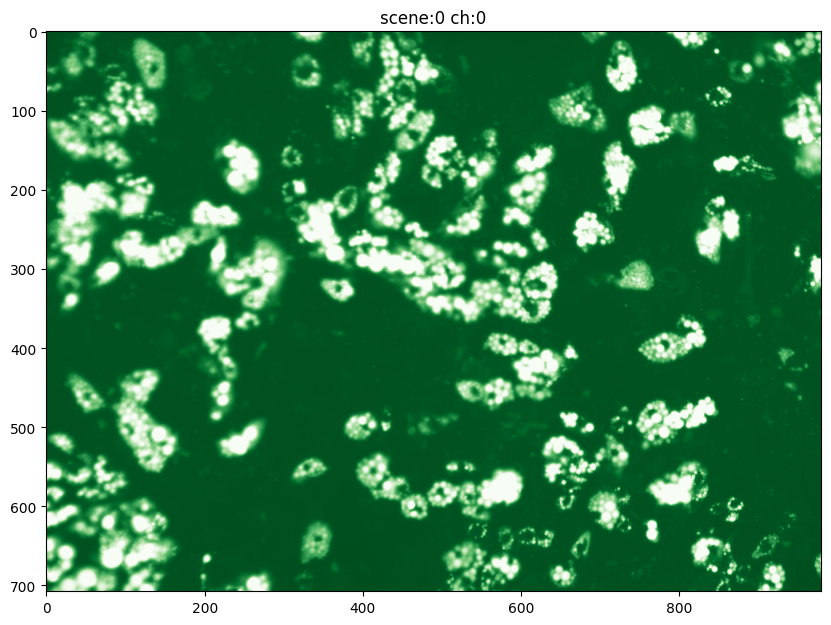

In [32]:
with pyczi.open_czi(czifile) as czidoc:
    c0_s0 = czidoc.read(plane={'C': 0}, scene=0)


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(c0_s0[..., 0], cmap=cm.Greens_r, vmin=100, vmax=16000)
ax.set_title("scene:0 ch:0")

In [2]:
from skimage.transform import resize

Tried to scale with np.resize. Didn't seem to work.

Text(0.5, 1.0, 'scene:0 ch:0')

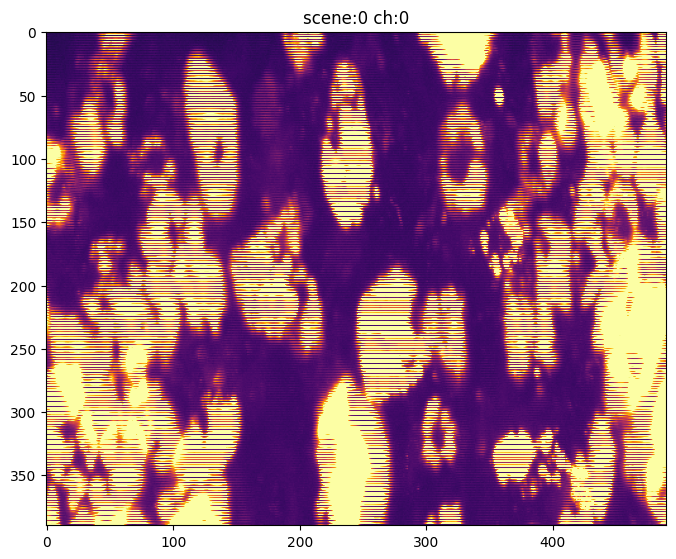

In [26]:
scaled_image = np.resize(c0_s0, (int(780/2), int(980/2)))

# Then display the scaled image
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(scaled_image, cmap=cm.inferno, vmin=100, vmax=4000)
ax.set_title("scene:0 ch:0")

Scaling down with scipy.ndimage seems to work

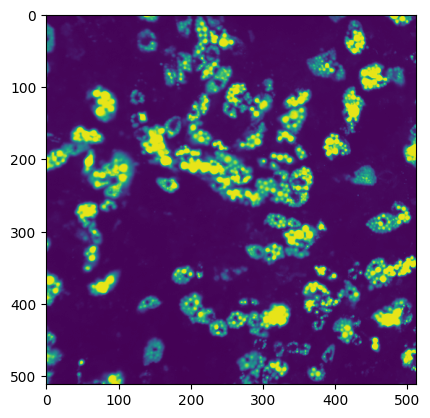

In [79]:
from scipy.ndimage import zoom

# Assume `image` is your NumPy array representing the image
# Let's say we want to reduce the resolution by half
zoom_factor = 0.7228

# Zoom the image. The zoom factor < 1 will reduce the size
rescaled_image = zoom(c0_s0, (zoom_factor, zoom_factor, 1))[:,98:610]  # The last dimension is for color channels

# Display the rescaled image
plt.imshow(rescaled_image)
plt.show()

In [38]:
type(rescaled_image)

numpy.ndarray

In [74]:
rescaled_image.shape

(512, 708, 1)

In [78]:
rescaled_image[:,98:610].shape

(512, 512, 1)

In [68]:
rescaled_image

array([[[ 667],
        [ 603],
        [ 655],
        ...,
        [9785],
        [9600],
        [7562]],

       [[ 619],
        [ 652],
        [ 639],
        ...,
        [8404],
        [7991],
        [6584]],

       [[ 606],
        [ 609],
        [ 644],
        ...,
        [9411],
        [8891],
        [6823]],

       ...,

       [[ 913],
        [1203],
        [1557],
        ...,
        [ 724],
        [ 713],
        [ 726]],

       [[1208],
        [1693],
        [2162],
        ...,
        [ 598],
        [ 619],
        [ 675]],

       [[1789],
        [2295],
        [3126],
        ...,
        [ 581],
        [ 611],
        [ 651]]], dtype=uint16)